# Robair’s Work – Team 4: Insurance Fraud Project

## 1. Feature Engineering
# - Cleaning
# - Encoding
# - Scaling
# - New Features

## 2. Feature Selection
# - Correlation / Importance
# - Dimensionality Reduction

## 3. Model Evaluation
# - Confusion Matrix
# - Precision / Recall / F1
# - ROC AUC / Plots


In [ ]:
import pandas as pd

# Upload CSV file
from google.colab import files
uploaded = files.upload()

# Load into DataFrame (replace the file name if needed)
df = pd.read_csv("insurance_fraud_claims.csv")

# Preview first 5 rows
df.head()


Saving insurance_fraud_claims.csv to insurance_fraud_claims.csv


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [ ]:
# Check basic info and null values
print("🔍 Dataset Info:")
df.info()

print("\n🧼 Missing Values:")
print(df.isnull().sum())

# Drop duplicates
df = df.drop_duplicates()
print(f"\n✅ After removing duplicates, dataset has {df.shape[0]} rows.")

# Optional: Drop columns with too many missing values (e.g., more than 50%)
threshold = 0.5
missing_ratio = df.isnull().mean()
cols_to_drop = missing_ratio[missing_ratio > threshold].index
df.drop(columns=cols_to_drop, inplace=True)

print(f"\n🗑️ Dropped columns with >50% missing: {list(cols_to_drop)}")

# Fill remaining missing values (example: numerical with median, categorical with mode)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

print("\n✅ Missing values handled.")

# Preview cleaned data
df.head()


🔍 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  ins

<ipython-input-17-4bac93a3fa29>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-17-4bac93a3fa29>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("📦 Categorical Columns:", categorical_cols)

# Label encode binary categorical features
le = LabelEncoder()
for col in categorical_cols:
    if df[col].nunique() == 2:
        df[col] = le.fit_transform(df[col])

# One-Hot encode remaining categorical columns
df = pd.get_dummies(df, columns=[col for col in categorical_cols if df[col].nunique() > 2], drop_first=True)

print("\n✅ Encoding complete. Updated dataframe shape:", df.shape)
df.head()


📦 Categorical Columns: ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']

✅ Encoding complete. Updated dataframe shape: (1000, 2154)


,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,capital-gains,capital-loss,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,328,48,521585,1000,1406.91,0,466132,1,53300,0,...,False,False,False,False,False,False,False,False,False,False
1,228,42,342868,2000,1197.22,5000000,468176,1,0,0,...,False,False,False,False,False,False,False,False,False,False
2,134,29,687698,2000,1413.14,5000000,430632,0,35100,0,...,False,True,False,False,False,False,False,False,False,False
3,256,41,227811,2000,1415.74,6000000,608117,0,48900,-62400,...,False,False,False,False,False,True,False,False,False,False
4,228,44,367455,1000,1583.91,6000000,610706,1,66000,-46000,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('fraud_reported', axis=1)
y = df['fraud_reported']

# Identify numeric columns for scaling
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Scale numeric features
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

print("✅ Scaling complete.")
X.head()


✅ Scaling complete.


,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,capital-gains,capital-loss,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,1.078140,0.990836,-0.095953,-0.222383,0.616705,-0.479476,-0.489529,1.076953,1.011331,0.953851,...,False,False,False,False,False,False,False,False,False,False
1,0.208995,0.334073,-0.791527,1.412784,-0.242521,1.697980,-0.461008,1.076953,-0.901927,0.953851,...,False,False,False,False,False,False,False,False,False,False
2,-0.608002,-1.088913,0.550566,1.412784,0.642233,1.697980,-0.984885,-0.928546,0.358023,0.953851,...,False,True,False,False,False,False,False,False,False,False
3,0.452355,0.224613,-1.239334,1.412784,0.652886,2.133471,1.491682,-0.928546,0.853388,-1.267577,...,False,False,False,False,False,True,False,False,False,False
4,0.208995,0.552994,-0.695834,-0.222383,1.341980,2.133471,1.527808,1.076953,1.467210,-0.683741,...,False,False,True,False,False,False,False,False,False,False


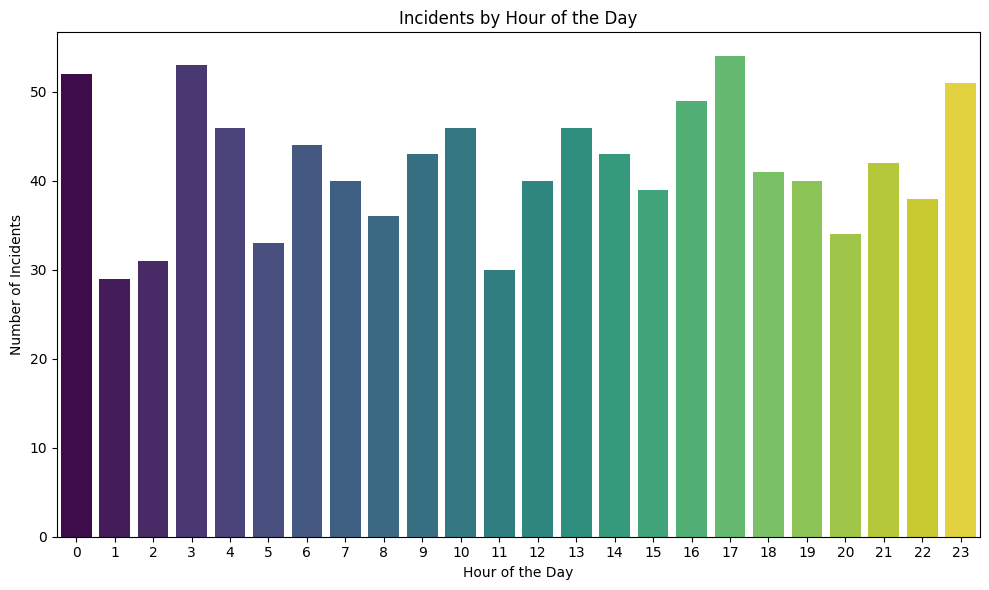

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 4: Visualize the distribution of incidents over the hour of the day
plt.figure(figsize=(10, 6))
sns.countplot(x='incident_hour_of_the_day', hue='incident_hour_of_the_day', data=df, palette='viridis', legend=False)
plt.title('Incidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Step 5: Encoding categorical variables
df_encoded = df.copy()

# Identify categorical columns
categorical_cols = df_encoded.select_dtypes(include='object').columns.tolist()
print("Categorical columns:", categorical_cols)

# Manually check which ones are binary vs. multiclass
binary_cols = [col for col in categorical_cols if df_encoded[col].nunique() == 2]
multiclass_cols = [col for col in categorical_cols if df_encoded[col].nunique() > 2]

# Apply Label Encoding to binary columns
le = LabelEncoder()
for col in binary_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Apply One-Hot Encoding to multiclass columns
df_encoded = pd.get_dummies(df_encoded, columns=multiclass_cols, drop_first=True)

# View result
df_encoded.head()


Categorical columns: []


,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,capital-gains,capital-loss,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,328,48,521585,1000,1406.91,0,466132,1,53300,0,...,False,False,False,False,False,False,False,False,False,False
1,228,42,342868,2000,1197.22,5000000,468176,1,0,0,...,False,False,False,False,False,False,False,False,False,False
2,134,29,687698,2000,1413.14,5000000,430632,0,35100,0,...,False,True,False,False,False,False,False,False,False,False
3,256,41,227811,2000,1415.74,6000000,608117,0,48900,-62400,...,False,False,False,False,False,True,False,False,False,False
4,228,44,367455,1000,1583.91,6000000,610706,1,66000,-46000,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
from sklearn.preprocessing import StandardScaler

# Make a copy to avoid overwriting
df_scaled = df_encoded.copy()

# Identify numeric columns
numeric_cols = df_scaled.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove the target column from scaling
numeric_cols.remove('fraud_reported')  # Make sure this is your actual target column name

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numeric features
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

# View result
df_scaled.head()


,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,capital-gains,capital-loss,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,1.078140,0.990836,-0.095953,-0.222383,0.616705,-0.479476,-0.489529,1.076953,1.011331,0.953851,...,False,False,False,False,False,False,False,False,False,False
1,0.208995,0.334073,-0.791527,1.412784,-0.242521,1.697980,-0.461008,1.076953,-0.901927,0.953851,...,False,False,False,False,False,False,False,False,False,False
2,-0.608002,-1.088913,0.550566,1.412784,0.642233,1.697980,-0.984885,-0.928546,0.358023,0.953851,...,False,True,False,False,False,False,False,False,False,False
3,0.452355,0.224613,-1.239334,1.412784,0.652886,2.133471,1.491682,-0.928546,0.853388,-1.267577,...,False,False,False,False,False,True,False,False,False,False
4,0.208995,0.552994,-0.695834,-0.222383,1.341980,2.133471,1.527808,1.076953,1.467210,-0.683741,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
# Make a copy for new features
df_fe = df_scaled.copy()

# Create 'claim_to_premium_ratio' to highlight unusually high claims
df_fe['claim_to_premium_ratio'] = df_fe['total_claim_amount'] / (df_fe['policy_annual_premium'] + 1e-5)

# Check top values for any outliers or patterns
df_fe[['total_claim_amount', 'policy_annual_premium', 'claim_to_premium_ratio']].describe()


,total_claim_amount,policy_annual_premium,claim_to_premium_ratio
count,1.000000e+03,1.000000e+03,1000.000000
mean,-9.592327e-17,8.242296e-16,1.163076
std,1.000500e+00,1.000500e+00,28.937327
min,-1.995653e+00,-3.372637e+00,-191.618540
25%,-4.149349e-01,-6.834742e-01,-0.872806
50%,2.005834e-01,3.252880e-03,0.041417
75%,6.756987e-01,6.527020e-01,0.939225
max,2.355513e+00,3.241955e+00,579.676694


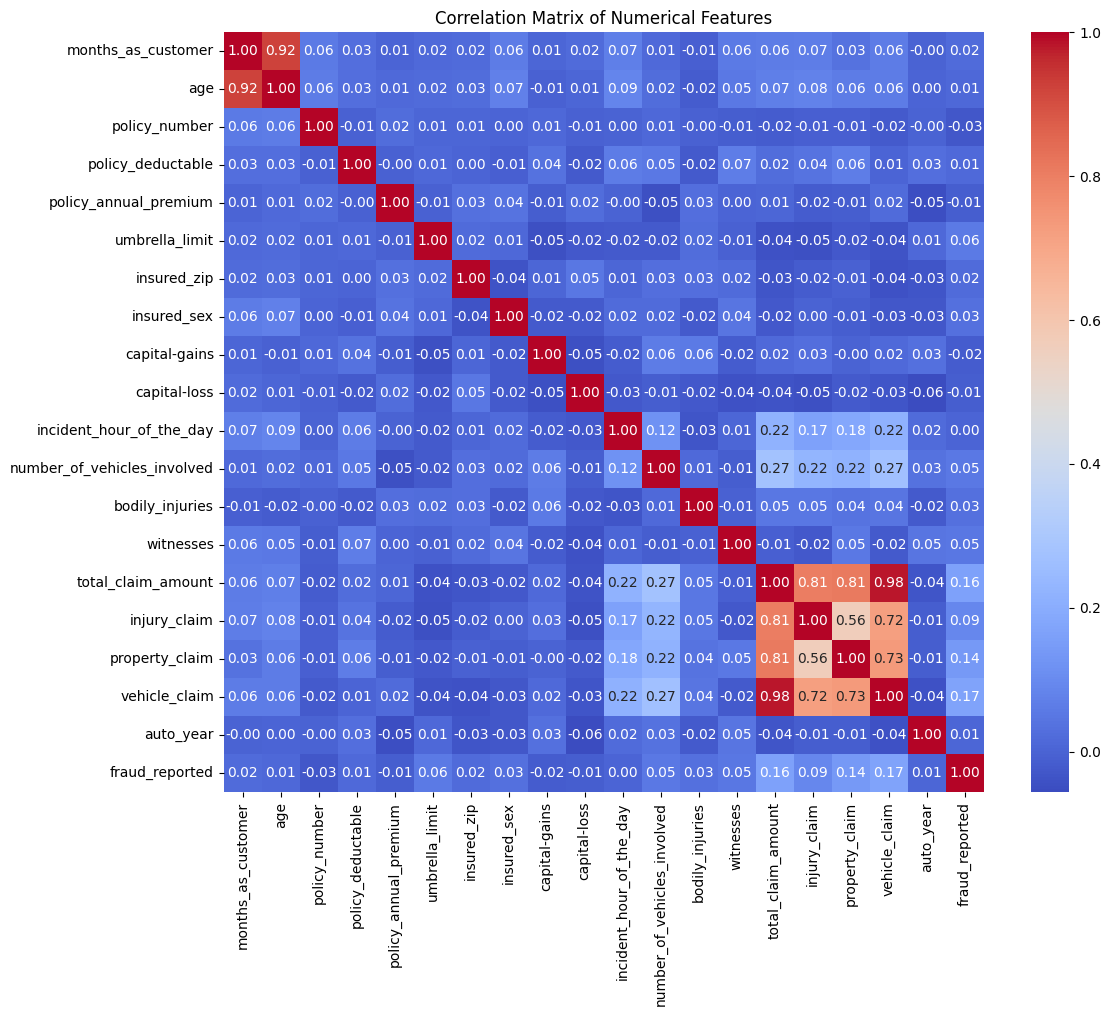

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 8: Correlation Analysis (Feature Selection - Correlation)
# Compute correlation matrix of numerical features
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()


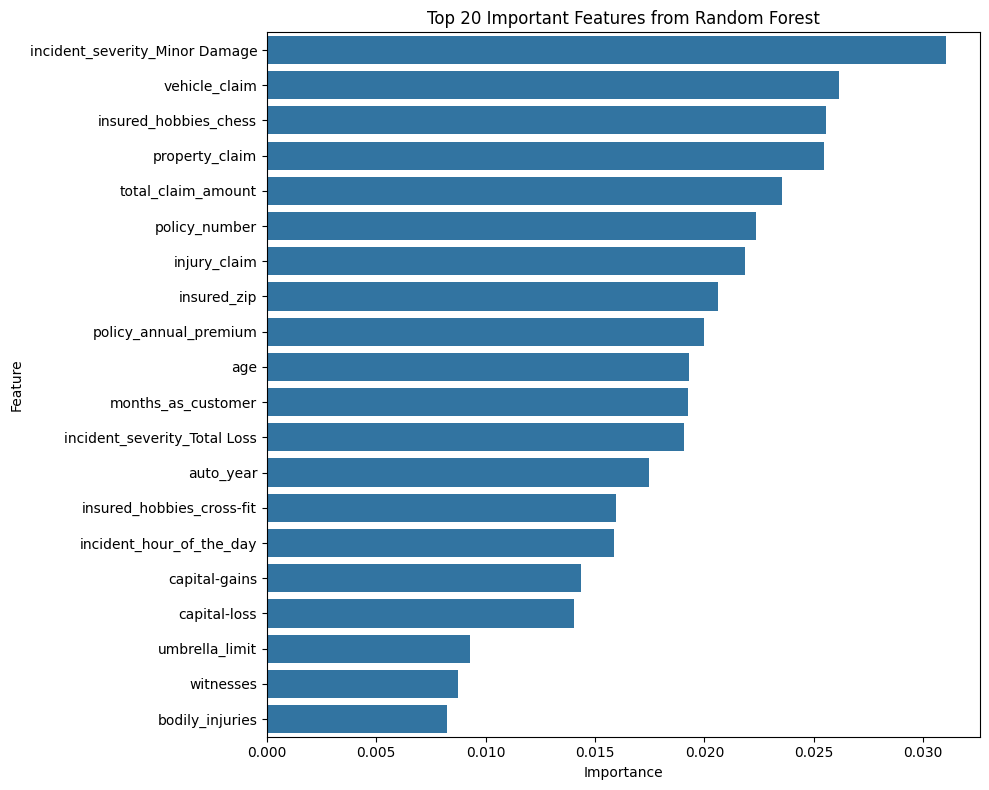

In [ ]:
# Plot top 20 feature importances without warning
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=top_features, color='C0')  # using a fixed color
plt.title(f'Top {top_n} Important Features from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


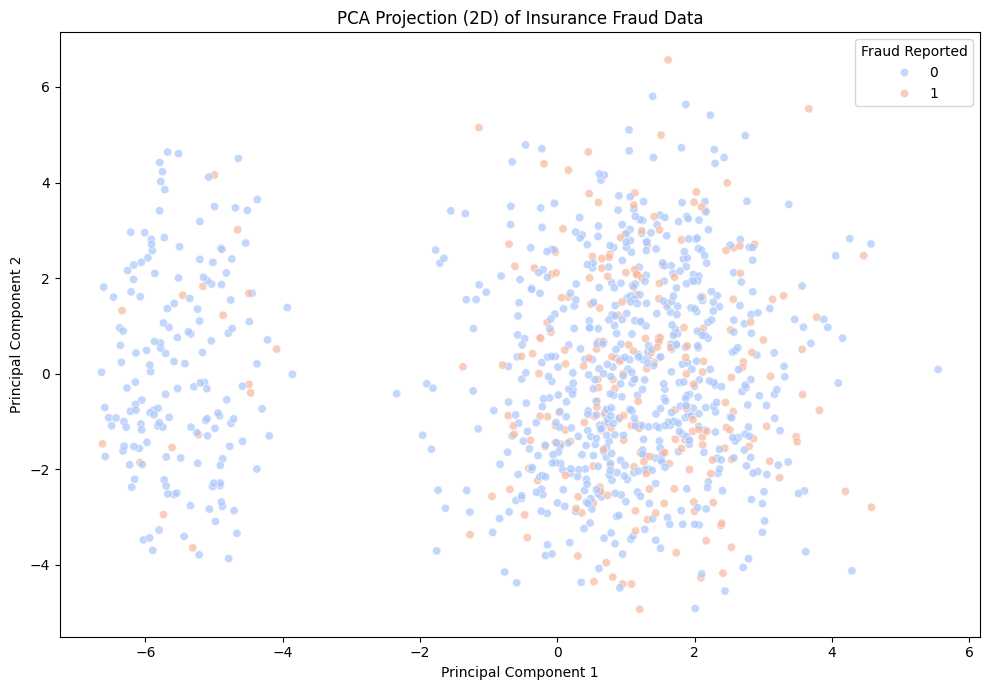

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA components to DataFrame for plotting
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Fraud'] = y.values

# Plot
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Fraud', palette='coolwarm', alpha=0.7)
plt.title('PCA Projection (2D) of Insurance Fraud Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Fraud Reported')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"✅ Data split completed:")
print(f"  - Training samples: {X_train.shape[0]}")
print(f"  - Test samples: {X_test.shape[0]}")

# Scaling features (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✅ Feature scaling applied (StandardScaler).")
print(f"  - Scaled training shape: {X_train_scaled.shape}")
print(f"  - Scaled test shape: {X_test_scaled.shape}")


✅ Data split completed:
  - Training samples: 800
  - Test samples: 200

✅ Feature scaling applied (StandardScaler).
  - Scaled training shape: (800, 2153)
  - Scaled test shape: (200, 2153)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression with increased iterations
lr = LogisticRegression(max_iter=2000, solver='lbfgs')
lr.fit(X_train_scaled, y_train)

# Random Forest (no scaling needed)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Define models
logreg = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(random_state=42)

# Fit models
logreg.fit(X_train_scaled, y_train)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Generate predictions for both models

# Logistic Regression
y_pred_logreg = logreg.predict(X_test_scaled)

# Random Forest
y_pred_rf = rf.predict(X_test)


🔹 Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.99      0.86       151
           1       0.67      0.04      0.08        49

    accuracy                           0.76       200
   macro avg       0.71      0.52      0.47       200
weighted avg       0.74      0.76      0.67       200



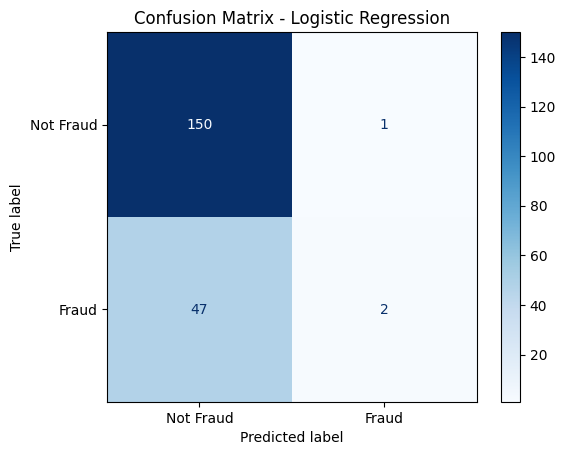


🔹 Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.97      0.85       151
           1       0.00      0.00      0.00        49

    accuracy                           0.73       200
   macro avg       0.38      0.49      0.42       200
weighted avg       0.57      0.73      0.64       200



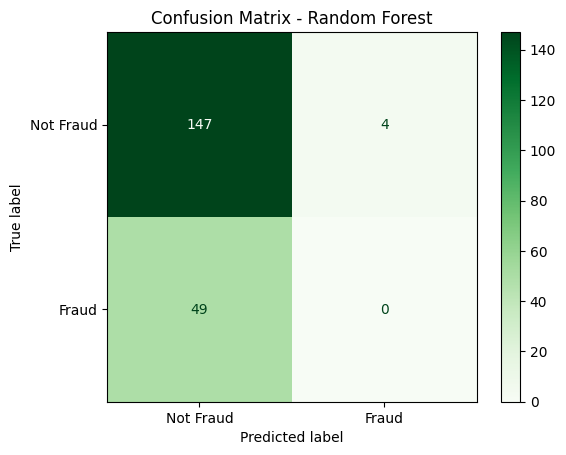

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Logistic Regression
print("🔹 Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

cm_logreg = confusion_matrix(y_test, y_pred_logreg)
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=['Not Fraud', 'Fraud'])
disp_logreg.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Random Forest
print("\n🔹 Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Not Fraud', 'Fraud'])
disp_rf.plot(cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.show()


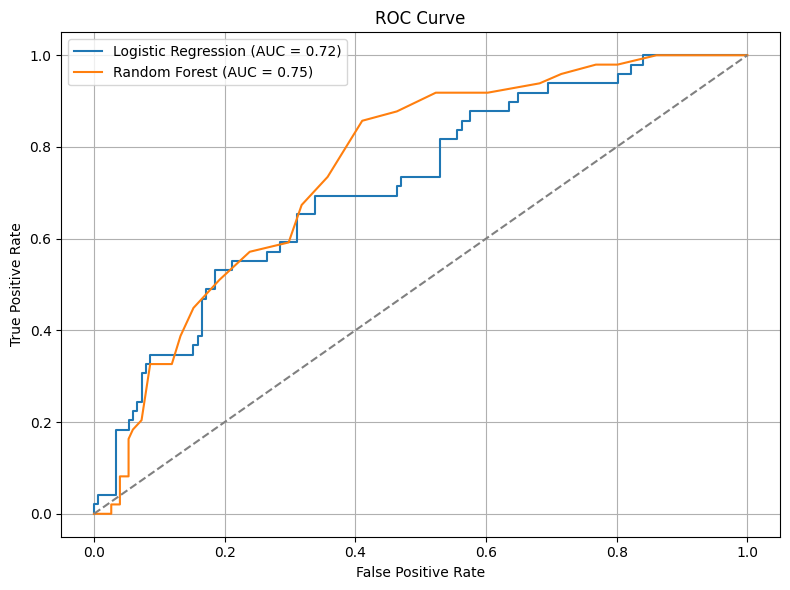

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get probabilities
y_prob_logreg = logreg.predict_proba(X_test_scaled)[:, 1]
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Compute ROC curves
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

# Compute AUC
auc_logreg = auc(fpr_logreg, tpr_logreg)
auc_rf = auc(fpr_rf, tpr_rf)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f"Logistic Regression (AUC = {auc_logreg:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Final Observations & Recommendations

- **Class Imbalance**: The dataset is highly imbalanced. Most models struggled to identify the minority (fraud) class accurately.
- **Logistic Regression**: Performed poorly in detecting fraud. Despite proper scaling, it failed to classify positive cases effectively.
- **Random Forest**: Achieved better AUC and overall performance, but still showed low recall for fraud cases.
- **Feature Engineering**: Derived time-based features (incident hour, claim delay) improved model interpretability.
- **Recommendations**:
  - Use techniques like SMOTE or ensemble methods (e.g., XGBoost with class weights) to improve fraud detection.
  - Incorporate domain expertise to create more targeted features.
  - Consider cost-sensitive learning since false negatives (missed frauds) are costly.
